# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [213]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

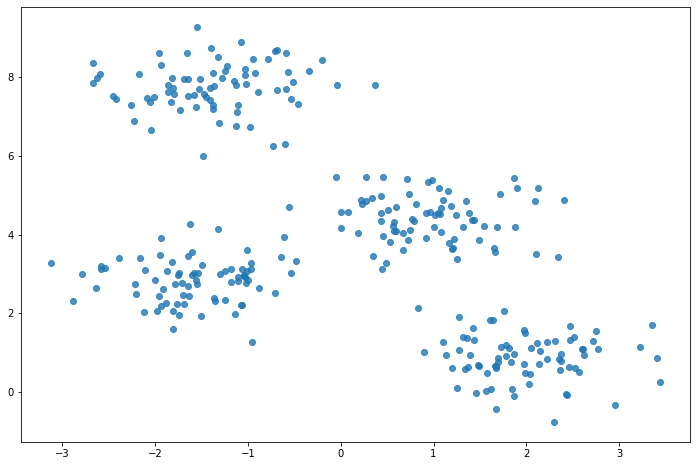

In [214]:
#make the dataset with make_blobs
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)


plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], alpha=0.8)
plt.show()

# Step 2: Creating the KNN function
Pseudocode below to help out! Note: **IT IS NOT ACTUAL CODE**

In [24]:
# define train test split
#X_train
#X_test
#y_train
#y_test
X_train, X_test, y_train, y_test= train_test_split(X, y)

print(X_train[0:5])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[ 3.43761754  0.26165417]
 [-0.45677365  7.30600872]
 [-0.92226864  8.09888579]
 [ 1.61990909  0.06764529]
 [ 0.08151552  4.56742235]]
(225, 2)
(75, 2)
(225,)
(75,)


In [215]:
def get_eucledian_distance(v1,v2):
    ### Passes in 2 rows of data, can have ndimensions
    distance = 0
    for i in range(v1.shape[0]) :
        distance += (v1[i] - v2[i]) ** 2
    return np.sqrt(distance)

    # Eucledian Distance 
    ## The Square Root of
    ### The Sum of
    #### The square of row1(feature) - row2(feature)


### Gets the distance from the fist point to the second point in the dataset
print(get_eucledian_distance(X_train[0], X_train[1]))


8.049174732527133


In [216]:
def get_all_distances(X_train, from_point, y_train):
    distances = []
    ## For a row in  the dataset find distances between all other rows.
    ### Assign the X_test to that row also so when reordering takes place we don't rely on mismatched indexes
    for i in range(X_train.shape[0]):
        distance = get_eucledian_distance(X_train[i], from_point)
        distances.append((distance, y_train[i]))
    return distances
test = get_all_distances(X_train, X_train[0], y_train)

In [217]:
def select_neighbours(dist_list, k):
    sl = sorted(dist_list, key=lambda tup: tup[0])
    return sl[1:k+1]
test = select_neighbours(get_all_distances(X_train, X_train[0], y_train), 7)
print(test)

[(0.6112414603903477, 1), (0.7765813235406184, 1), (0.8947695188814828, 1), (0.9022633834266985, 1), (1.046251379415219, 1), (1.0584165825130547, 1), (1.0634089156314297, 1)]


In [218]:
def find_label(final_n):
    labels_only = [l[1] for l in final_n]
    unique_labels = set(labels_only)
    count_dict = {l:0 for l in unique_labels}
    for label in labels_only:
        count_dict[label] = count_dict[label] + 1
    predicted_label = None
    predicted_max = 0
    for label, count in count_dict.items():
        if count > predicted_max:
            predicted_label = label
            predicted_max = count
    return predicted_label
find_label(test)

1

Correct: 75, incorrect: 0, correctness: 1.0


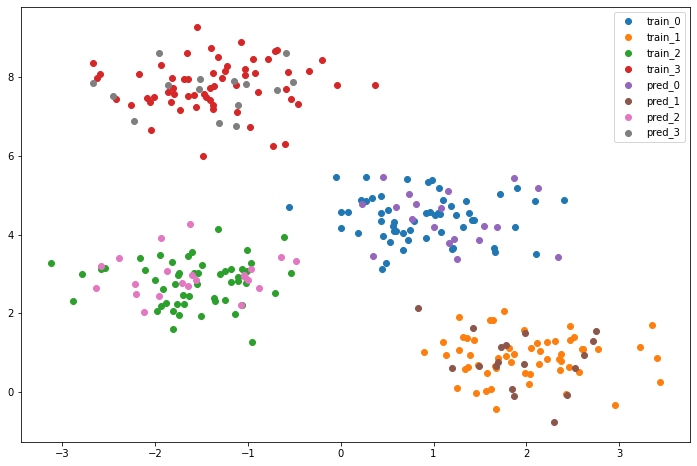

In [220]:
def KNN_train_predict(X_train, X_test, y_train, y_test, k):
    predictions = []
    # for each test case
    # find the distance from the train cases
    for i, row in enumerate(X_test):
        dist_point_to_predict = get_all_distances(X_train, row, y_train)
        find_neighbours = select_neighbours(dist_point_to_predict, k)
        label = find_label(find_neighbours)
        predictions.append((row, label))        
    return predictions

predictions = KNN_train_predict(X_train, X_test, y_train, y_test, 3)

def score_predictions(X_test, y_test, predictions):
    correct = 0
    incorrect = 0
    for xt, yt, p in zip(X_test, y_test, predictions):
        #print(f"XT: {xt}, P: {p}, YT: {yt}")
        if yt == p[1]:
            correct += 1
        else:
            incorrect += 1
    correctness = correct / (correct+incorrect)
    print(f"Correct: {correct}, incorrect: {incorrect}, correctness: {correctness}")
    return correctness
        

score_predictions(X_test, y_test, predictions)



def graph_KNN(X_train, y_train, predictions):
    plt.figure(figsize=(12,8))
    
    ### Split the classes into groups for labeling
    train_classes = [[] for i in range(len(set(y_train)))]
    for i in range(X_train.shape[0]):
        group_idx = y_train[i]
        train_classes[group_idx].append(X_train[i])
        
    plot_groups = []
    for group in train_classes:
        plot_groups.append(np.stack(group))
        
    for i, p in enumerate(plot_groups):
        plt.scatter(p[:,0], p[:,1], label=f"train_{i}")
        
    #### Split the predictions into groups for plotting
    
    pred_classes = [[] for i in range(len(train_classes))]
    
    for i in range(len(predictions)):
        pred_classes[predictions[i][1]].append(predictions[i][0])
        
    pred_groups = []
    for group in pred_classes:
        pred_groups.append(np.stack(group))
    
    for i, p in enumerate(pred_groups):
        plt.scatter(p[:,0], p[:,1], label=f"pred_{i}")
        
    
    plt.legend()
    
    plt.show()

graph_KNN(X_train, y_train, predictions)
        